In [ ]:
# 1. Importing the Necessary Modules

import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2. Defining the Sample Documents

documents = [
    "Data science is an interdisciplinary field",
    "Machine learning is a part of data science",
    "Deep learning is a branch of machine learning"
]

print("Documents:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

Documents:
1. Data science is an interdisciplinary field
2. Machine learning is a part of data science
3. Deep learning is a branch of machine learning


BoW Vectorization

In [ ]:
bow_vectors = []

for doc in tokenized_docs:
    word_count = Counter(doc)
    bow_vectors.append([word_count[word] for word in vocab])

bow_df = pd.DataFrame(bow_vectors, columns=vocab)
print("\nBag of Words (BoW) Vectorization:")
display(bow_df)


Bag of Words (BoW) Vectorization:


,a,an,branch,data,deep,field,interdisciplinary,is,learning,machine,of,part,science
0,0,1,0,1,0,1,1,1,0,0,0,0,1
1,1,0,0,1,0,0,0,1,1,1,1,1,1
2,1,0,1,0,1,0,0,1,2,1,1,0,0


In [ ]:
# Cosine Similarity (BoW)

cosine_bow = cosine_similarity(bow_df)
cosine_bow_df = pd.DataFrame(cosine_bow, columns=["Doc1", "Doc2", "Doc3"], index=["Doc1", "Doc2", "Doc3"])

print("\nCosine Similarity (BoW):")
display(cosine_bow_df)


Cosine Similarity (BoW):


,Doc1,Doc2,Doc3
Doc1,1.000000,0.433013,0.129099
Doc2,0.433013,1.000000,0.670820
Doc3,0.129099,0.670820,1.000000


TF Vectorization

In [ ]:
tf_vectors = []

for doc in tokenized_docs:
    word_count = Counter(doc)
    total_words = len(doc)
    tf_vectors.append([word_count[word]/total_words for word in vocab])

tf_df = pd.DataFrame(tf_vectors, columns=vocab)
print("\nTerm Frequency (TF) Vectorization:")
display(tf_df)


Term Frequency (TF) Vectorization:


,a,an,branch,data,deep,field,interdisciplinary,is,learning,machine,of,part,science
0,0.000,0.166667,0.000,0.166667,0.000,0.166667,0.166667,0.166667,0.000,0.000,0.000,0.000,0.166667
1,0.125,0.000000,0.000,0.125000,0.000,0.000000,0.000000,0.125000,0.125,0.125,0.125,0.125,0.125000
2,0.125,0.000000,0.125,0.000000,0.125,0.000000,0.000000,0.125000,0.250,0.125,0.125,0.000,0.000000


In [ ]:
# Cosine Similarity (TF)

cosine_tf = cosine_similarity(tf_df)
cosine_tf_df = pd.DataFrame(cosine_tf, columns=["Doc1", "Doc2", "Doc3"], index=["Doc1", "Doc2", "Doc3"])

print("\nCosine Similarity (TF):")
display(cosine_tf_df)


Cosine Similarity (TF):


,Doc1,Doc2,Doc3
Doc1,1.000000,0.433013,0.129099
Doc2,0.433013,1.000000,0.670820
Doc3,0.129099,0.670820,1.000000


TF-IDF Vectorization

In [ ]:
idf_vector = []
N = len(documents)

for word in vocab:
    df = sum([1 for doc in tokenized_docs if word in doc])
    idf = math.log(N / (1 + df))
    idf_vector.append(idf)

tf_idf_matrix = np.array(tf_vectors) * np.array(idf_vector)
tfidf_df = pd.DataFrame(tf_idf_matrix, columns=vocab)

print("\nTF-IDF Vectorization:")
display(tfidf_df)


TF-IDF Vectorization:


,a,an,branch,data,deep,field,interdisciplinary,is,learning,machine,of,part,science
0,0.0,0.067578,0.000000,0.0,0.000000,0.067578,0.067578,-0.047947,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,-0.035960,0.0,0.0,0.0,0.050683,0.0
2,0.0,0.000000,0.050683,0.0,0.050683,0.000000,0.000000,-0.035960,0.0,0.0,0.0,0.000000,0.0


In [ ]:
# Cosine Similarity (TF-IDF)

cosine_tfidf = cosine_similarity(tfidf_df)
cosine_tfidf_df = pd.DataFrame(cosine_tfidf, columns=["Doc1", "Doc2", "Doc3"], index=["Doc1", "Doc2", "Doc3"])

print("\nCosine Similarity (TF-IDF):")
display(cosine_tfidf_df)


Cosine Similarity (TF-IDF):


,Doc1,Doc2,Doc3
Doc1,1.000000,0.219349,0.169984
Doc2,0.219349,1.000000,0.259487
Doc3,0.169984,0.259487,1.000000


Plot Heatmaps

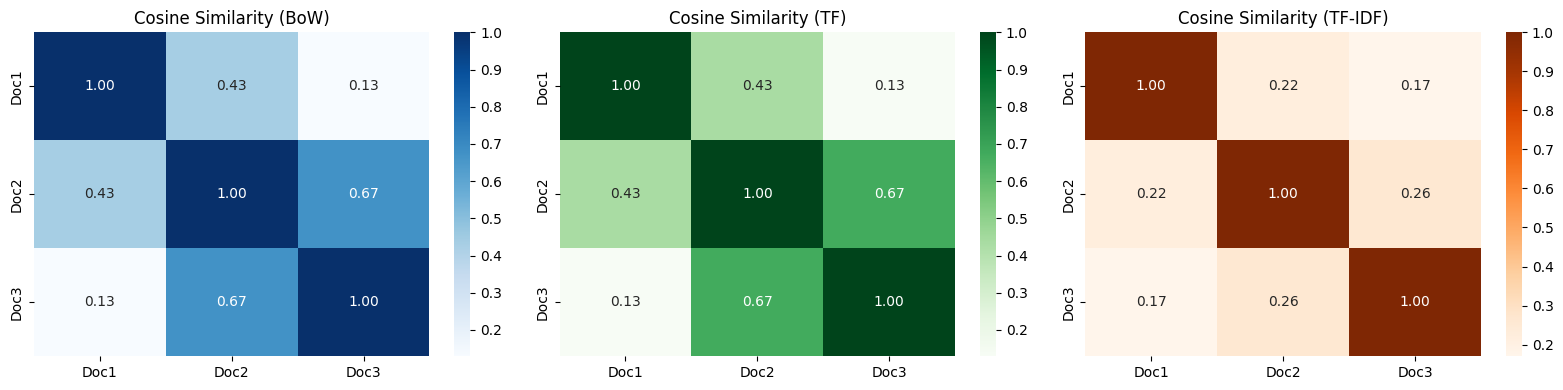

In [ ]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1) # Specify subplot index as 1
sns.heatmap(cosine_bow_df, annot=True, cmap="Blues", fmt=".2f")
plt.title("Cosine Similarity (BoW)")

plt.subplot(1, 3, 2) # Specify subplot index as 2
sns.heatmap(cosine_tf_df, annot=True, cmap="Greens", fmt=".2f")
plt.title("Cosine Similarity (TF)")

plt.subplot(1, 3, 3) # Specify subplot index as 3
sns.heatmap(cosine_tfidf_df, annot=True, cmap="Oranges", fmt=".2f")
plt.title("Cosine Similarity (TF-IDF)")

plt.tight_layout()
plt.show()